# Input dataset has information on different indian apartments(their characteristics and price points)- This is fictitious data

In [60]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Frequency Distribution

In [7]:
from IPython.display import display

display(df['basement'].value_counts())
display(df['furnishingstatus'].value_counts())
display(df['guestroom'].value_counts())
display(df['parking'].value_counts())
display(df['airconditioning'].value_counts())
display(df['mainroad'].value_counts())

no     354
yes    191
Name: basement, dtype: int64

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

no     448
yes     97
Name: guestroom, dtype: int64

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

no     373
yes    172
Name: airconditioning, dtype: int64

yes    468
no      77
Name: mainroad, dtype: int64

Semi-furnished houses have the highest preference

In [8]:
df[df['prefarea']=='yes']['furnishingstatus'].value_counts()

semi-furnished    52
furnished         43
unfurnished       33
Name: furnishingstatus, dtype: int64

In [16]:
from IPython.display import display

print("\n furnished houses\n")
display((df['furnishingstatus'].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%"))

print("\n furnished houses with guest rooms:\n")
display((df[df['furnishingstatus'] == 'furnished']['guestroom'].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%"))


 furnished houses



semi-furnished    41.65%
unfurnished       32.66%
furnished         25.69%
Name: furnishingstatus, dtype: object


 furnished houses with guest rooms:



no     75.71%
yes    24.29%
Name: guestroom, dtype: object

Percentage of houses(that are furnished or semi funished) and have a main road

In [17]:
display(
    (df[df['furnishingstatus'].isin(['furnished', 'semi-furnished'])]['mainroad']
     .value_counts(normalize=True) * 100)
    .apply(lambda x: f"{x:.2f}%")
)

yes    89.10%
no     10.90%
Name: mainroad, dtype: object

Majority of preferred areas do not have airconditioning

In [18]:
df[df['prefarea'].isin(['yes'])]['airconditioning'].value_counts()

no     75
yes    53
Name: airconditioning, dtype: int64

Majority do not prefer homes that have greater than 3 stories

In [27]:
df[df['stories']>3]['prefarea'].value_counts()

no     32
yes     9
Name: prefarea, dtype: int64

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Presence of a main road increases the house price, as evident from the results

In [29]:
a=df.groupby(['furnishingstatus','mainroad'])['price'].mean().reset_index()
a.sort_values(by='price', ascending=False,inplace=True)
a

,furnishingstatus,mainroad,price
1,furnished,yes,5.638843e+06
3,semi-furnished,yes,5.083288e+06
5,unfurnished,yes,4.263397e+06
2,semi-furnished,no,3.796247e+06
0,furnished,no,3.412111e+06
4,unfurnished,no,3.062784e+06


In [56]:
#missing values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Visualization

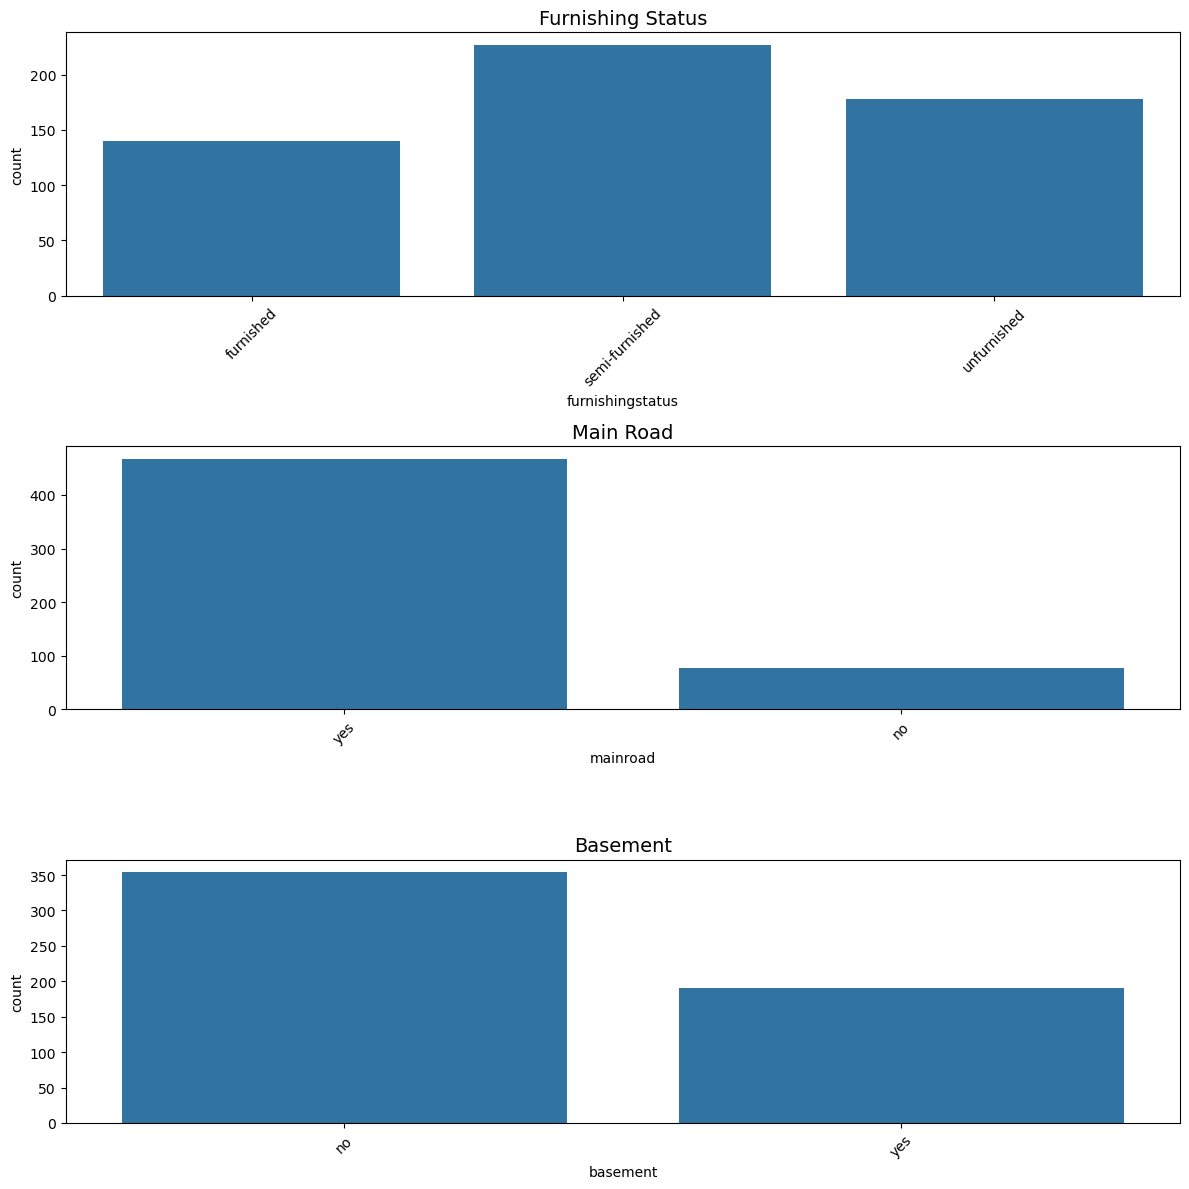

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

sns.countplot(x='furnishingstatus', data=df, ax=ax[0])
ax[0].set_title('Furnishing Status', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(x='mainroad', data=df, ax=ax[1])
ax[1].set_title('Main Road', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)

sns.countplot(x='basement', data=df, ax=ax[2])
ax[2].set_title('Basement', fontsize=14)
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

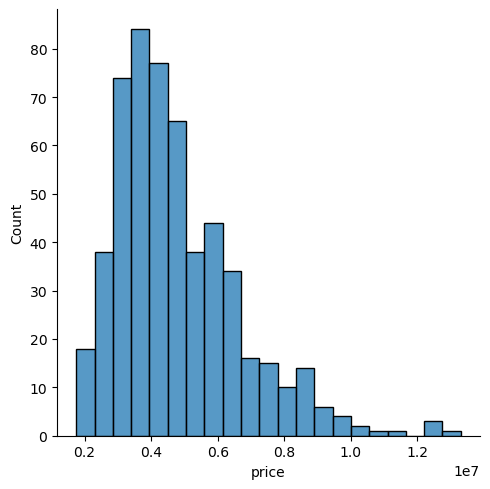

In [57]:
sns.displot(df['price'])

<Axes: xlabel='parking', ylabel='Count'>

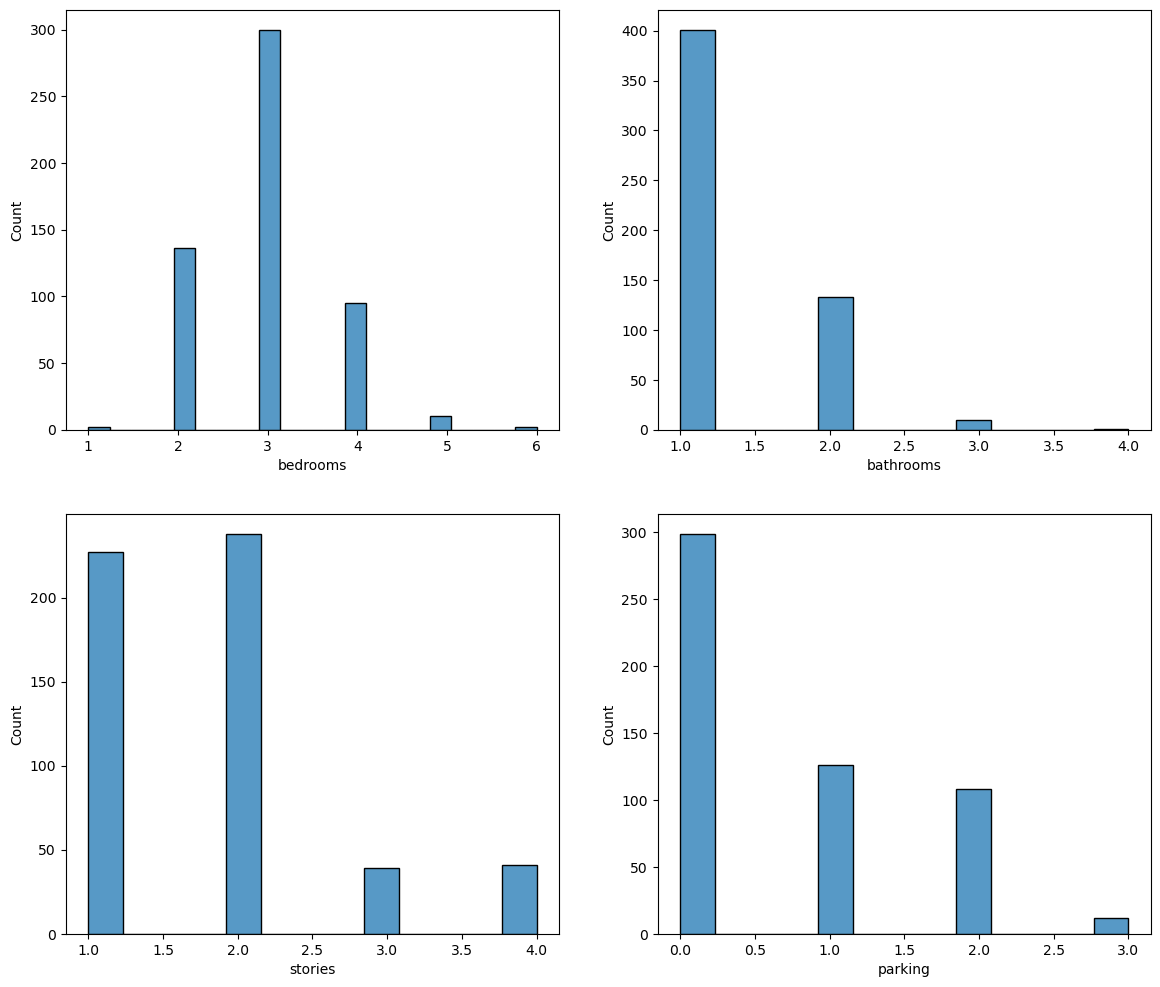

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(df['bedrooms'],ax=ax[0,0])
sns.histplot(df['bathrooms'], ax=ax[0,1])
sns.histplot(df['stories'], ax=ax[1,0])
sns.histplot(df['parking'], ax=ax[1,1])

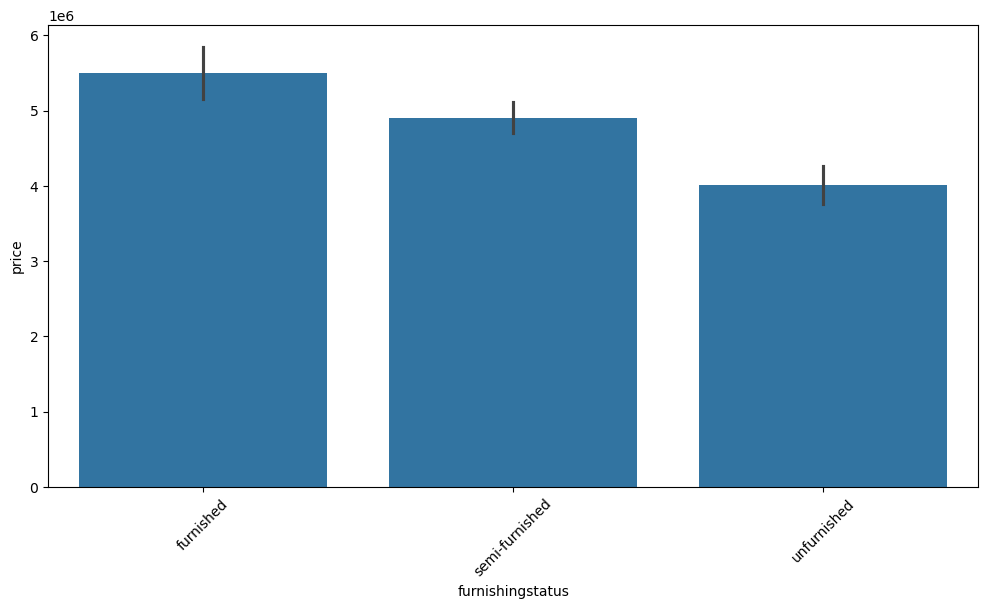

In [36]:
import numpy as np

plt.figure(figsize=(12, 6)) 
sns.barplot(x='furnishingstatus',y='price',data=df,estimator=np.mean)
plt.xticks(rotation=45)
plt.show()

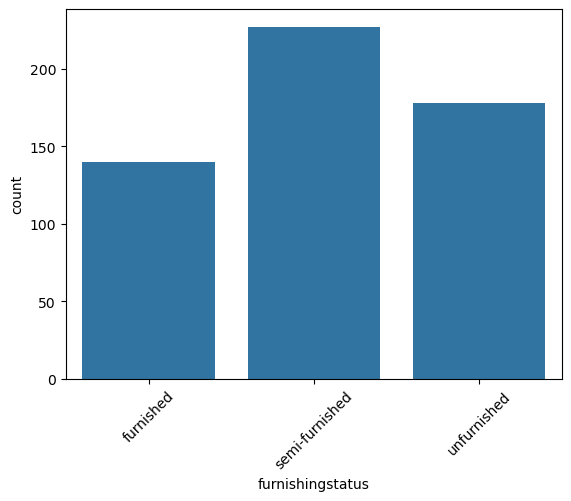

In [37]:
sns.countplot(x='furnishingstatus',data=df)
plt.xticks(rotation=45)
#plt.figure(figsize=(12, 6))
plt.show()

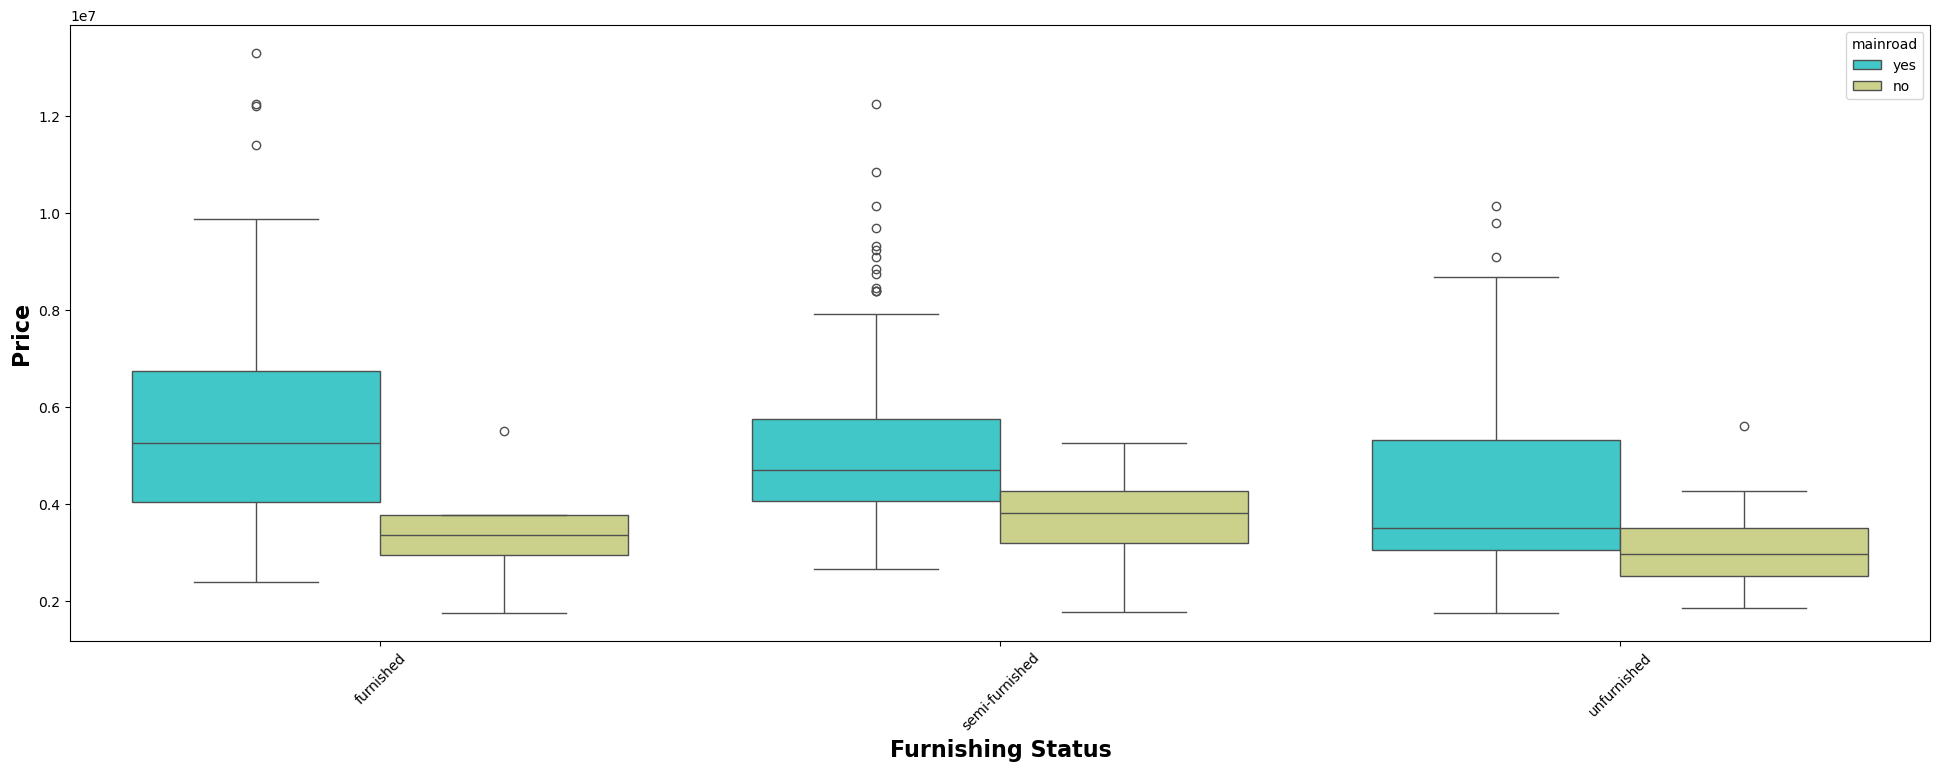

In [38]:
plt.figure(figsize=(24, 8))
sns.boxplot(x="furnishingstatus", y="price", data=df, hue="mainroad",palette='rainbow')
plt.xticks(rotation=45)
plt.xlabel("Furnishing Status", fontsize=16, fontweight='bold')
plt.ylabel("Price", fontsize=16, fontweight='bold')
plt.show()

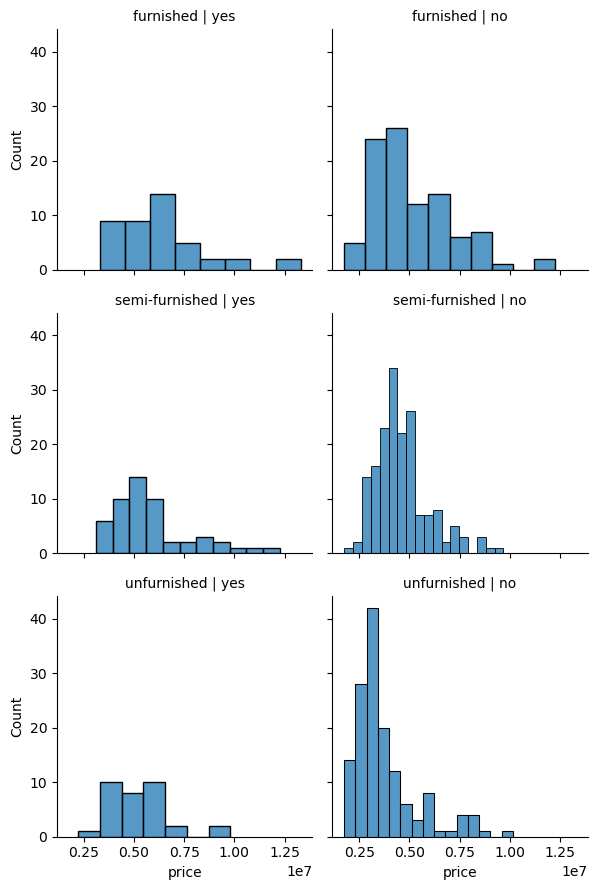

In [39]:
g = sns.FacetGrid(df, col="prefarea",  row="furnishingstatus")
g = g.map(sns.histplot, "price").add_legend()
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Machine Learning

In [70]:
df.head()
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib as plt
import seaborn as sns
import sklearn

In [71]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [72]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


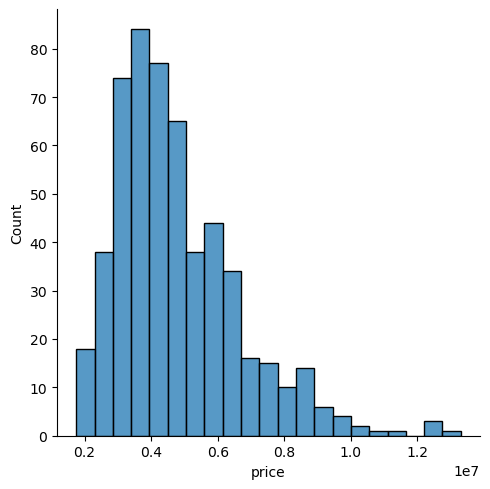

In [44]:
sns.displot(df['price'])

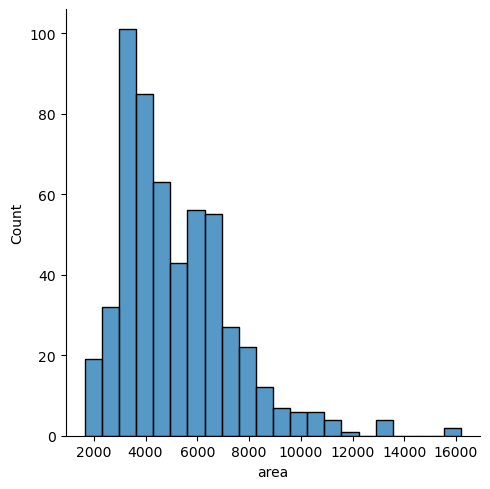

In [45]:
sns.displot(df['area'])

<Axes: >

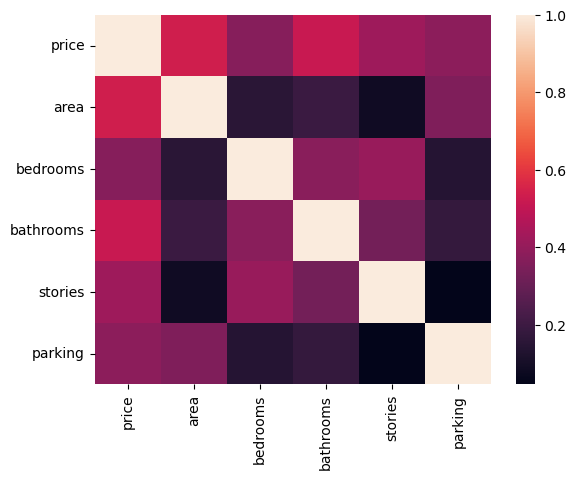

In [47]:
sns.heatmap(df.corr(numeric_only=True))

In [45]:
#dealing with outliers& na

df=df.dropna(axis=1)
out=df['price'].quantile(0.99)
df2 = df[df['price']<out]


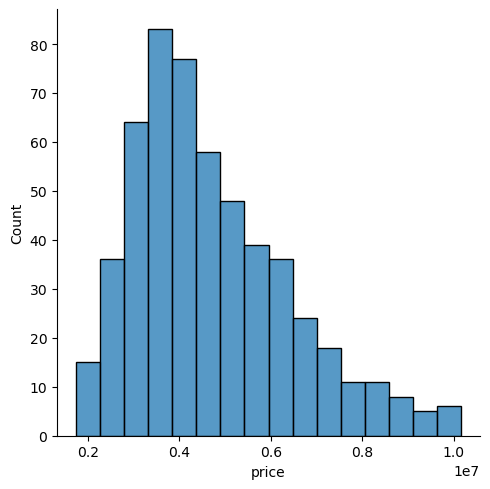

In [61]:
sns.displot(df2['price'])

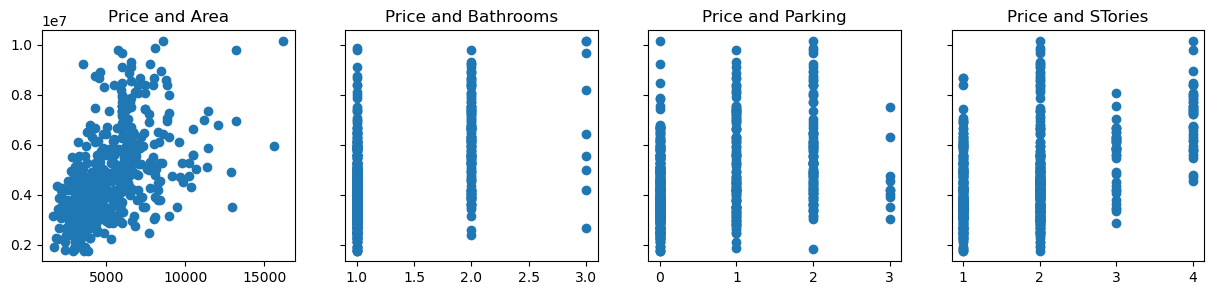

In [66]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(df2['area'],df2['price'])
ax1.set_title('Price and Area')
ax2.scatter(df2['bathrooms'],df2['price'])
ax2.set_title('Price and Bathrooms')
ax3.scatter(df2['parking'],df2['price'])
ax3.set_title('Price and Parking')
ax4.scatter(df2['stories'],df2['price'])
ax4.set_title('Price and STories')

plt.show()

multicollinearity and dummy variables

In [67]:
df2.columns.values

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [4]:
df2=pd.get_dummies(df2,columns=['mainroad'], drop_first=True)
df2.tail()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes
540,1820000,3000,2,1,1,no,yes,no,no,2,no,unfurnished,1
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished,0
542,1750000,3620,2,1,1,no,no,no,no,0,no,unfurnished,1
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished,0
544,1750000,3850,3,1,2,no,no,no,no,0,no,unfurnished,1


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df2[['area', 'bathrooms','parking','stories','mainroad_yes']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,7.110730,area
1,7.250772,bathrooms
2,1.869202,parking
3,5.636803,stories
4,6.344132,mainroad_yes


In [ ]:
#vif<10

LINEAR REGRESSION

In [89]:
X = df2[['area', 'bathrooms','parking','stories','mainroad_yes']]

y = np.log(df2['price'])


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)

#log transformation

#y2 = np.log(df2['price'])
#x2=np.log(df2[['area', 'bathrooms','parking','stories','mainroad_yes']])

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)

In [93]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [94]:
y_hat = reg.predict(x_train)

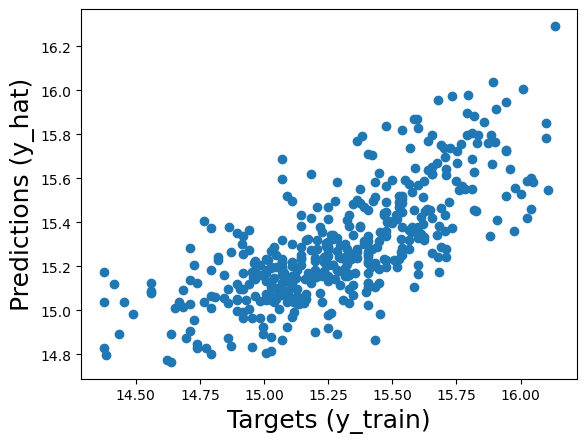

In [95]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

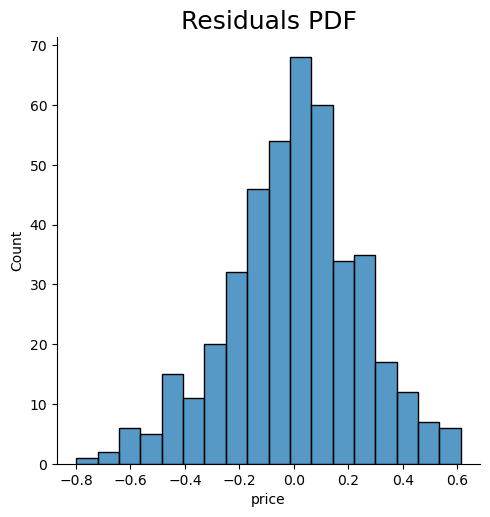

In [96]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [97]:
reg.score(x_train,y_train)

0.5361342229877477

In [98]:
reg.intercept_

15.2931024761171

In [99]:
reg.coef_

array([0.12878316, 0.09164964, 0.04967043, 0.10634812, 0.05791456])

In [100]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,area,0.128783
1,bathrooms,0.091650
2,parking,0.049670
3,stories,0.106348
4,mainroad_yes,0.057915


In [101]:
y_hat_test = reg.predict(x_test)

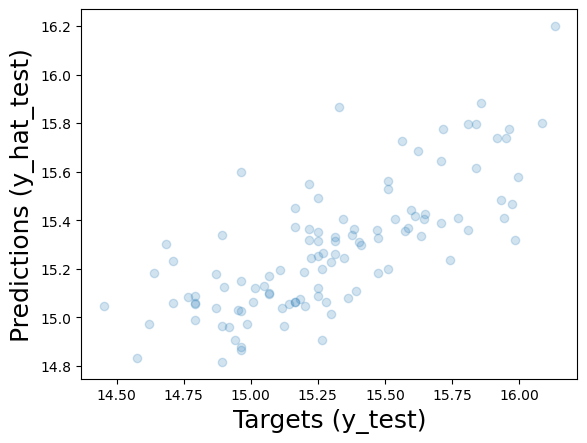

In [103]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [108]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

pd.options.display.float_format = '{:,.6f}'.format
df_pf.head()

,Prediction
0,"3,554,169.958118"
1,"5,002,453.029585"
2,"3,136,227.564066"
3,"4,126,824.295320"
4,"3,456,544.012870"


Logistic Regression

In [109]:
import statsmodels.api as sm
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [111]:
df['basement2'] = df['basement'].map({'yes':1,'no':0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,basement2
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0


In [5]:
#scaling the variables

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])
df2['price_scaled'] = scaler.fit_transform(df2[['price']])

<Axes: >

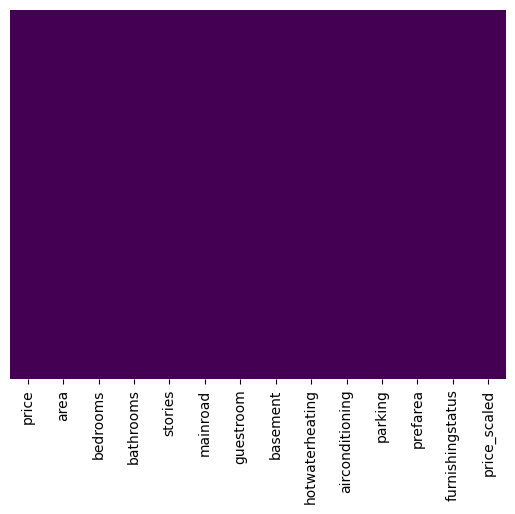

In [15]:
#missing data

import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='basement2', ylabel='count'>

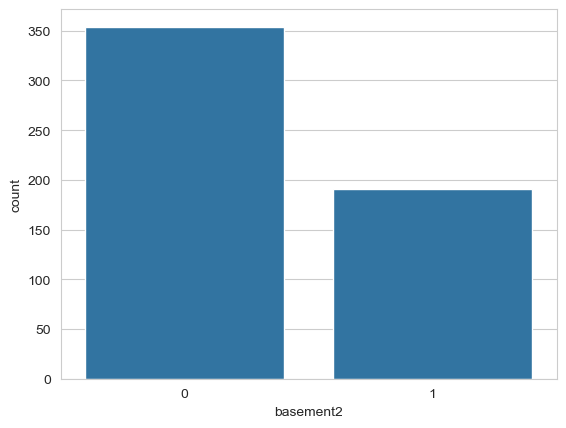

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='basement2',data=df)

Only a small fraction of houses without basements are preferred 

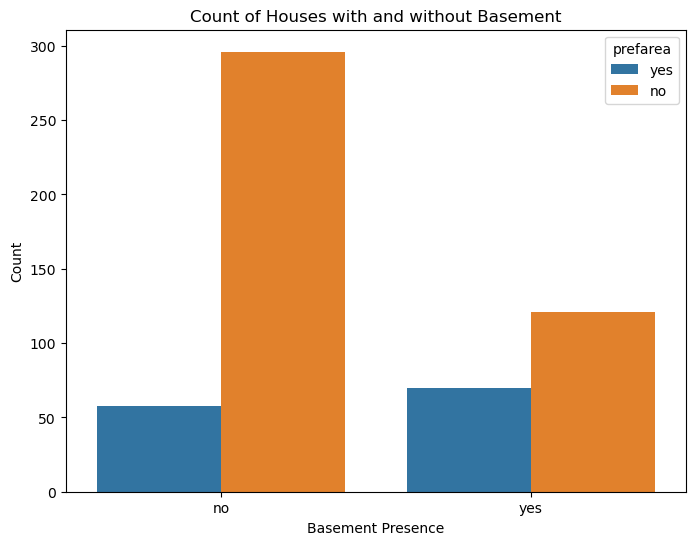

In [7]:
#df['basement2'] = df['basement2'].map({0: 'No Basement', 1: 'Has Basement'})

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='basement', hue='prefarea', data=df)

# Set titles and labels
plt.title("Count of Houses with and without Basement")
plt.xlabel("Basement Presence")
plt.ylabel("Count")
plt.show()



In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,basement2,price_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,3.554979


In [46]:
y = df['basement2']
x = df[['price_scaled','bathrooms','stories']]

In [47]:
x = sm.add_constant(x)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

results_log.summary()

Optimization terminated successfully.
         Current function value: 0.588836
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              basement2   No. Observations:                  545
Model:                          Logit   Df Residuals:                      541
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                 0.09092
Time:                        12:10:01   Log-Likelihood:                -320.92
converged:                       True   LL-Null:                       -353.01
Covariance Type:            nonrobust   LLR p-value:                 7.459e-14
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5065      0.344      1.472      0.141      -0.168       1.181
price_scaled     0.6438      0.122      5.298      0.000       0.406       0.882
bathrooms        0.2669      0.222      1.204      0.229      -0.167       0.701
stories         -0.8501      0.136     -6.231      0.000      -1.117      -0.583
================================================================================
"""

In [48]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,327.0,27.0
Actual 1,124.0,67.0


In [49]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7229357798165138

# KNN

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [116]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,basement2,price_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,3.554979


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['basement2','bedrooms','stories','price_scaled']])


StandardScaler()

In [118]:
scaled_features=scaler.transform(df[['basement2','bedrooms','stories','price_scaled']])

In [119]:
df_feat = pd.DataFrame(scaled_features,columns=['basement2','bedrooms','stories','price_scaled'])
df_feat.head()

,basement2,bedrooms,stories,price_scaled
0,-0.734539,1.403419,1.378217,4.566365
1,-0.734539,1.403419,2.532024,4.004484
2,1.361397,0.047278,0.224410,4.004484
3,1.361397,1.403419,0.224410,3.985755
4,1.361397,1.403419,0.224410,3.554979


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['furnishingstatus'],
                                                    test_size=0.30)

Choose K value based on error rate

In [123]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [132]:
pred = knn.predict(X_test)

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(confusion_matrix(y_test,pred))

[[ 9 24  4]
 [ 7 57 10]
 [ 5 22 26]]


In [135]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

     furnished       0.43      0.24      0.31        37
semi-furnished       0.55      0.77      0.64        74
   unfurnished       0.65      0.49      0.56        53

      accuracy                           0.56       164
     macro avg       0.54      0.50      0.50       164
  weighted avg       0.56      0.56      0.54       164



In [136]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

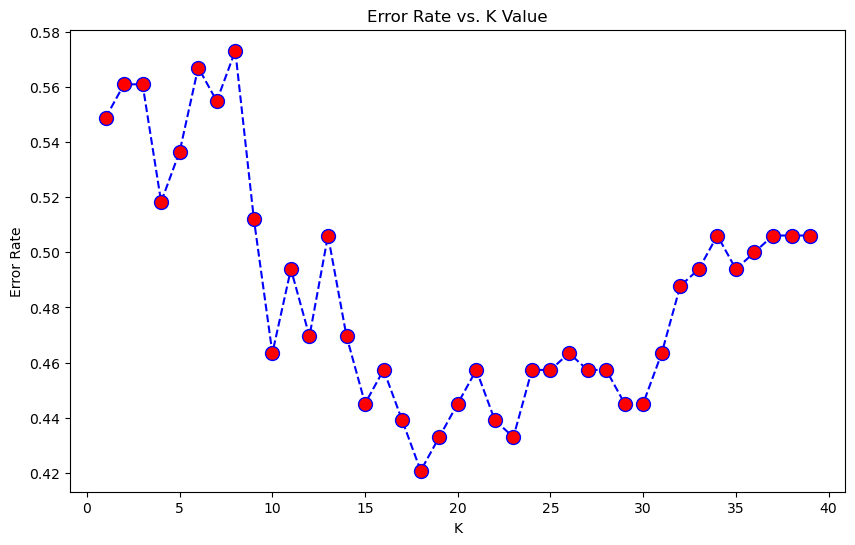

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Random Forest

In [138]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,basement2,price_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,3.554979


In [22]:
df2.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,price_scaled
6,10150000,8580,4,3,4,no,no,no,yes,2,yes,semi-furnished,1,3.193322
7,10150000,16200,5,3,2,no,no,no,no,0,no,unfurnished,1,3.193322
8,9870000,8100,4,1,2,yes,yes,no,yes,2,yes,furnished,1,3.029690
9,9800000,5750,3,2,4,yes,no,no,yes,1,yes,unfurnished,1,2.988783
10,9800000,13200,3,1,2,no,yes,no,yes,2,yes,furnished,1,2.988783


In [23]:
df2['basement2'] = df2['basement'].map({'yes':1,'no':0})


<Axes: xlabel='basement', ylabel='count'>

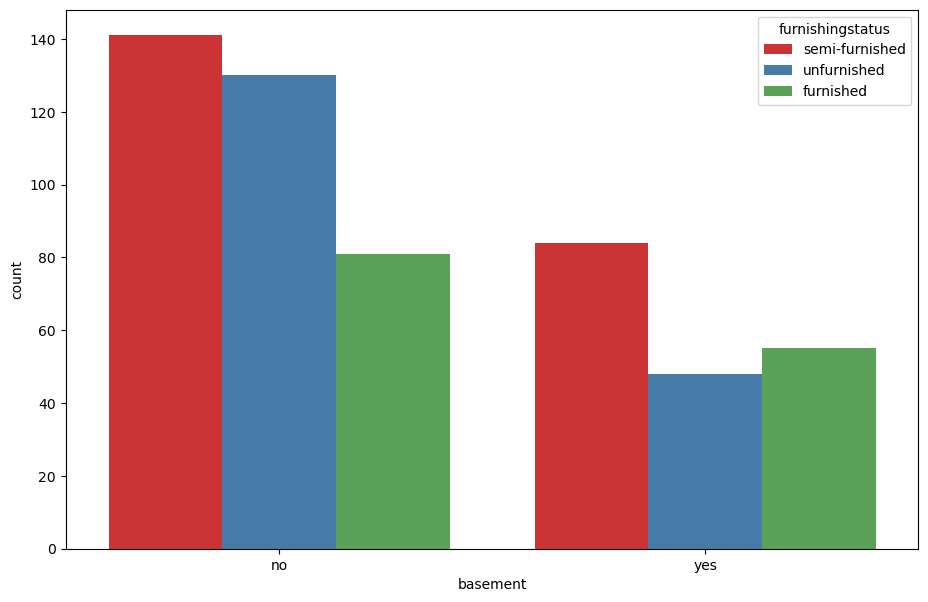

In [12]:
#count of basements by furnishing status-type
plt.figure(figsize=(11,7))
sns.countplot(x='basement',hue='furnishingstatus',data=df2,palette='Set1')


<Figure size 1100x700 with 0 Axes>

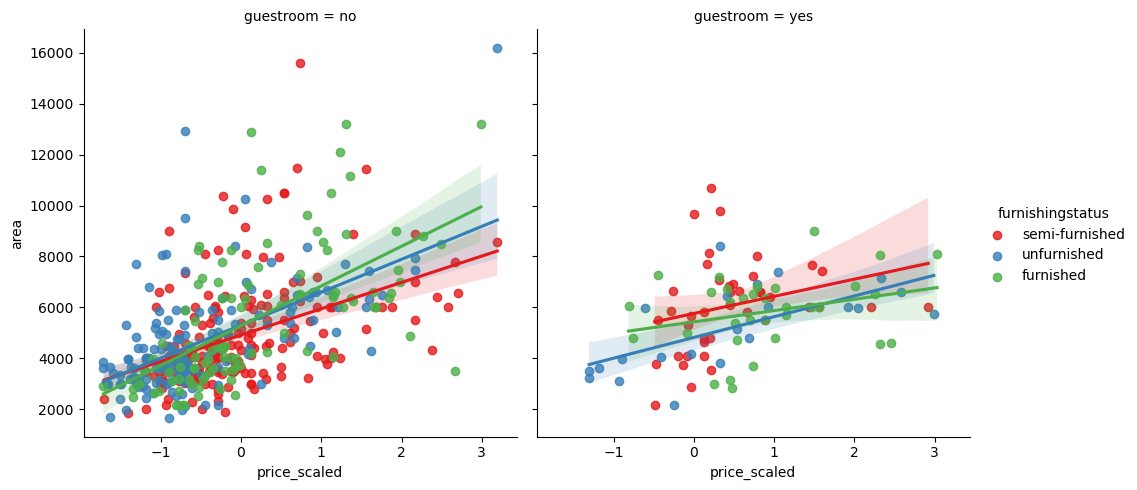

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(y='area',x='price_scaled',data=df2,hue='furnishingstatus',
           col='guestroom',palette='Set1')

Regression line of furnished houses show a steeper slope 

Text(0.5, 0, 'area')

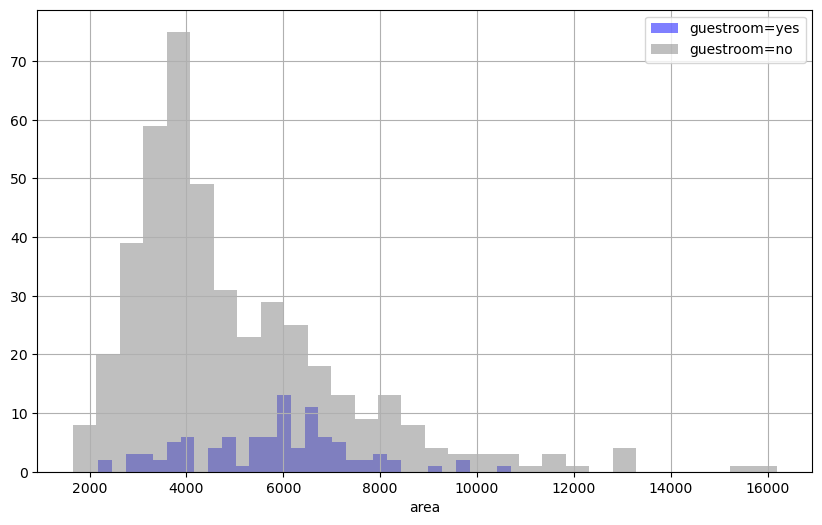

In [144]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df2[df2['guestroom']=='yes']['area'].hist(alpha=0.5,color='blue',
                                              bins=30,label='guestroom=yes')
df2[df2['guestroom']=='no']['area'].hist(alpha=0.5,color='grey',
                                              bins=30,label='guestroom=no')
plt.legend()
plt.xlabel('area')

Text(0.5, 0, 'area')

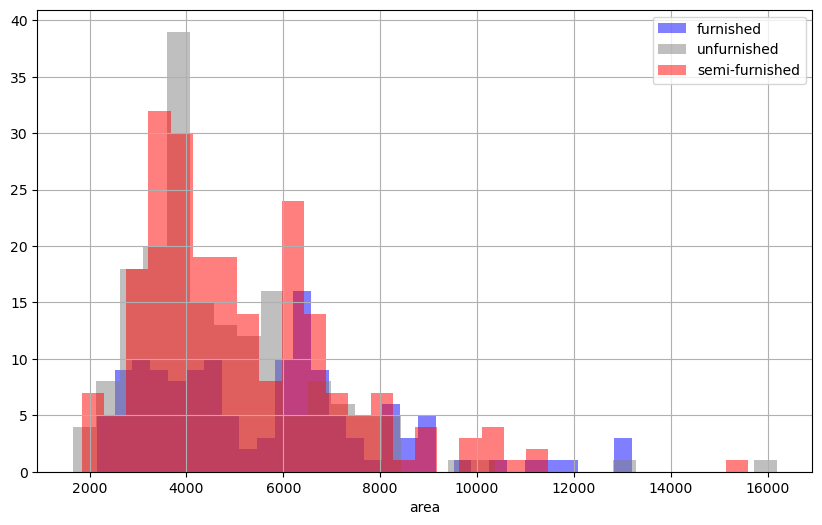

In [146]:
#House types

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df2[df2['furnishingstatus']=='furnished']['area'].hist(alpha=0.5,color='blue',
                                              bins=30,label='furnished')
df2[df2['furnishingstatus']=='unfurnished']['area'].hist(alpha=0.5,color='grey',
                                              bins=30,label='unfurnished')
df2[df2['furnishingstatus']=='semi-furnished']['area'].hist(alpha=0.5,color='red',
                                              bins=30,label='semi-furnished')
plt.legend()
plt.xlabel('area')

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
rfc = RandomForestClassifier(n_estimators=600)

In [30]:
x=df2[['basement2','bedrooms','stories','price_scaled']]
y=df2['furnishingstatus']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)



RandomForestClassifier(n_estimators=600)

In [33]:
predictions = rfc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     furnished       0.30      0.19      0.23        48
semi-furnished       0.46      0.53      0.49        68
   unfurnished       0.37      0.43      0.40        46

      accuracy                           0.40       162
     macro avg       0.38      0.38      0.37       162
  weighted avg       0.39      0.40      0.39       162



In [35]:
print(confusion_matrix(y_test,predictions))

[[ 9 23 16]
 [14 36 18]
 [ 7 19 20]]


# Support Vector Machines:
Works well in high-dimensional spaces
Effective when the number of features is greater than the number of samples


In [46]:
df2.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price_scaled'],
      dtype='object')

In [47]:
df2=pd.get_dummies(df2,columns=['mainroad','hotwaterheating', 'airconditioning','basement','prefarea','guestroom'], drop_first=True)

In [49]:
#scaling the variables

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df2['price_scaled'] = scaler.fit_transform(df2[['price']])

In [50]:
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,price_scaled,mainroad_yes,hotwaterheating_yes,airconditioning_yes,basement_yes,prefarea_yes,guestroom_yes
6,10150000,8580,4,3,4,2,semi-furnished,3.193322,1,0,1,0,1,0
7,10150000,16200,5,3,2,0,unfurnished,3.193322,1,0,0,0,0,0
8,9870000,8100,4,1,2,2,furnished,3.029690,1,0,1,1,1,1
9,9800000,5750,3,2,4,1,unfurnished,2.988783,1,0,1,0,1,1
10,9800000,13200,3,1,2,2,furnished,2.988783,1,0,1,1,1,0


In [55]:
x=df2[['area', 'bedrooms', 'bathrooms', 'stories',
       'hotwaterheating_yes', 'airconditioning_yes','parking'
       ,'mainroad_yes', 'basement_yes','price_scaled']]
y=df2['furnishingstatus']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [56]:
from sklearn.svm import SVC
model = SVC(class_weight='balanced')
model.fit(X_train,y_train)

SVC(class_weight='balanced')

In [57]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[16 13 19]
 [ 6 17 45]
 [ 5  8 33]]


In [58]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     furnished       0.59      0.33      0.43        48
semi-furnished       0.45      0.25      0.32        68
   unfurnished       0.34      0.72      0.46        46

      accuracy                           0.41       162
     macro avg       0.46      0.43      0.40       162
  weighted avg       0.46      0.41      0.39       162

